In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

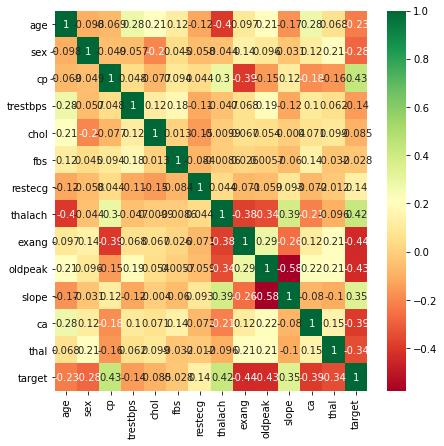

In [6]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A51177B400>,
      dtype=object)

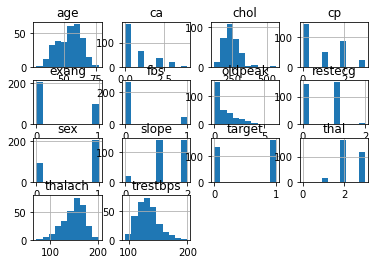

In [7]:
df.hist()

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

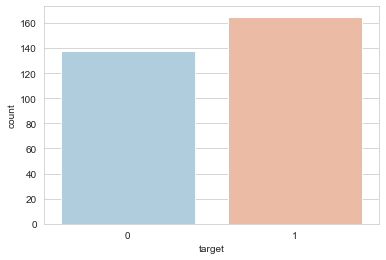

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [9]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [12]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions))
print('precision', precision_score(y_test, final_predictions))
print('recall', recall_score(y_test, final_predictions))
print('f1', f1_score(y_test, final_predictions))

RandomForestClassifier(max_features=8, n_estimators=10, random_state=42)
CF [[36  5]
 [12 38]]
precision 0.8837209302325582
recall 0.76
f1 0.8172043010752689


In [16]:
roc_auc_score(y_test, final_predictions)

0.8190243902439025

### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
        'n_neighbors': list(range(1, 31)), 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']
    }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, params, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions))
print('precision', precision_score(y_test, final_predictions))
print('recall', recall_score(y_test, final_predictions))
print('f1', f1_score(y_test, final_predictions))

KNeighborsClassifier(metric='manhattan', n_neighbors=4)
CF [[34  7]
 [13 37]]
precision 0.8409090909090909
recall 0.74
f1 0.7872340425531915


In [18]:
roc_auc_score(y_test, final_predictions)

0.7846341463414634

### logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression()

grid_search = GridSearchCV(lr, grid_values, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions))
print('precision', precision_score(y_test, final_predictions))
print('recall', recall_score(y_test, final_predictions))
print('f1', f1_score(y_test, final_predictions))

LogisticRegression(C=1)
CF [[33  8]
 [ 5 45]]
precision 0.8490566037735849
recall 0.9
f1 0.8737864077669903


In [20]:
roc_auc_score(y_test, final_predictions)

0.8524390243902439

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, tree_para, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions))
print('precision', precision_score(y_test, final_predictions))
print('recall', recall_score(y_test, final_predictions))
print('f1', f1_score(y_test, final_predictions))

DecisionTreeClassifier(max_depth=4)
CF [[28 13]
 [16 34]]
precision 0.723404255319149
recall 0.68
f1 0.7010309278350516


In [22]:
roc_auc_score(y_test, final_predictions)

0.6814634146341463

### SVM

In [23]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
sv = SVC()

grid_search = GridSearchCV(sv, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions))
print('precision', precision_score(y_test, final_predictions))
print('recall', recall_score(y_test, final_predictions))
print('f1', f1_score(y_test, final_predictions))

SVC(C=100, gamma=0.001)
CF [[34  7]
 [ 5 45]]
precision 0.8653846153846154
recall 0.9
f1 0.8823529411764707


In [24]:
roc_auc_score(y_test, final_predictions)

0.8646341463414633

#### SO, if we target more on precision, we use random forest. BUt, if we wanted to target on recall, we will lock at SVM.

###### For this model, since we are predicting heart diseases, we take svm as our main model. Since, it predicted that 7 are having heart condition while they not have and did not identify 5 people having heart condition

the model can be improvised by collecting more data and adding more features

### Multi Class classification

#### one vs one for svc

In [25]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [28]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [32]:
some_digit = X[0]

In [33]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit0])

array(['5'], dtype=object)

In [34]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [35]:
np.argmax(some_digit_scores)

5

In [36]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [37]:
svm_clf.classes_[5]

'5'

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC(gamma="auto", random_state=42))
ovo_clf.fit(X_train[:1000], y_train[:1000])
ovo_clf.predict([some_digit])

array(['5'], dtype=object)

In [42]:
some_digit = X[1]
ovo_clf.predict([some_digit])

array(['0'], dtype=object)

In [43]:
some_digit = X[2]
ovo_clf.predict([some_digit])

array(['4'], dtype=object)

#### one vs rest for sgdclassifier

In [45]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['4'], dtype='<U1')

In [46]:
sgd_clf.decision_function([some_digit])

array([[-34143.40703505, -21942.13780869,  -4018.29275037,
         -2239.19313075,     43.09419826, -15058.88052383,
        -33653.31059893,  -8277.80610963,  -7460.52016321,
        -14180.15338984]])

In [47]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [48]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array(['4'], dtype='<U1')

In [49]:
len(ovr_clf.estimators_)

10

In [50]:
some_digit = X[1]
ovr_clf.predict([some_digit])

array(['0'], dtype='<U1')

In [51]:
some_digit = X[2]
ovr_clf.predict([some_digit])

array(['4'], dtype='<U1')

#### random forest classifier -- doent require any multiclass specifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
some_digit = X[2]
forest_clf.fit(X_train[:1000], y_train[:1000])
forest_clf.predict([some_digit])

array(['4'], dtype=object)

### logistic regression

In [59]:
lr = LogisticRegression()
some_digit = X[2]
lr.fit(X_train[:1000], y_train[:1000])
lr.predict([some_digit])

array(['4'], dtype=object)